In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

import seaborn as sns

from sklearn import model_selection, decomposition, preprocessing
from sklearn import linear_model, tree, ensemble

In [2]:
def science_plot(fontsize = 9):
    import scienceplots
    plt.style.use(['science','grid','notebook'])
    plt.rcParams.update({
        'font.size'       : fontsize,    # General font size
        'axes.titlesize'  : fontsize,    # Font size of the axes title
        'axes.labelsize'  : fontsize,    # Font size of the axes labels
        'xtick.labelsize' : fontsize,    # Font size of the x-axis tick labels
        'ytick.labelsize' : fontsize,    # Font size of the y-axis tick labels
        'legend.fontsize' : fontsize,    # Font size of the legend
        'figure.titlesize': fontsize,    # Font size of the figure title
        'legend.fancybox' : False,       # Disable the fancy box for legend
        'legend.edgecolor': 'k',         # Set legend border color to black
        'text.usetex'     : True,        # Use LaTeX for text rendering
        'font.family'     : 'serif'      # Set font family to serif
    })
science_plot()

In [3]:
customer_data = pd.read_csv("mergedcustomers.csv")

# Drop the ID column
customer_data = customer_data.drop(['ID'], axis=1)
# Show table column names and contents
print(customer_data.columns)
customer_data

Index(['CHURNRISK', 'GENDER', 'STATUS', 'CHILDREN', 'ESTINCOME', 'HOMEOWNER',
       'AGE', 'TOTALDOLLARVALUETRADED', 'TOTALUNITSTRADED',
       'LARGESTSINGLETRANSACTION', 'SMALLESTSINGLETRANSACTION',
       'PERCENTCHANGECALCULATION', 'DAYSSINCELASTLOGIN', 'DAYSSINCELASTTRADE',
       'NETREALIZEDGAINS_YTD', 'NETREALIZEDLOSSES_YTD'],
      dtype='object')


,CHURNRISK,GENDER,STATUS,CHILDREN,ESTINCOME,HOMEOWNER,AGE,TOTALDOLLARVALUETRADED,TOTALUNITSTRADED,LARGESTSINGLETRANSACTION,SMALLESTSINGLETRANSACTION,PERCENTCHANGECALCULATION,DAYSSINCELASTLOGIN,DAYSSINCELASTTRADE,NETREALIZEDGAINS_YTD,NETREALIZEDLOSSES_YTD
0,Medium,M,M,2,28766.90,N,47,6110.61,58,1527.6525,152.76525,8.70,2,13,0.0000,152.76525
1,Low,M,M,2,91272.20,Y,25,26992.70,13,13496.3500,1349.63500,3.25,4,10,1349.6350,0.00000
2,Low,F,S,0,73228.30,N,42,22472.25,28,11236.1250,1123.61250,7.00,4,5,1123.6125,0.00000
3,High,M,M,1,64792.30,N,52,13051.31,36,6525.6550,652.56550,9.00,3,6,0.0000,652.56550
4,High,F,S,0,93322.10,Y,40,29922.99,8,14961.4950,1496.14950,2.00,4,9,0.0000,1496.14950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,High,F,S,0,64319.20,N,41,3010.30,37,752.5750,75.25750,5.55,1,18,0.0000,150.51500
2062,Medium,F,S,1,73338.00,N,48,20922.09,9,10461.0450,1046.10450,2.25,1,9,0.0000,1046.10450
2063,Medium,F,S,0,433.74,N,61,3300.33,40,825.0825,82.50825,6.00,5,11,0.0000,82.50825
2064,Low,F,M,2,16962.20,N,45,18601.86,8,9300.9300,930.09300,2.00,1,5,930.0930,0.00000


In [4]:
# Unlike your previous class outputs, there is no need to provide the code used to run the models. Instead, the three components of your one-page output would be:
# figures comparing the classifiers used
# brief description of the dataset, what each column means, and how the classifier used works
# brief description of the classifiers performed.

In [5]:
## For illustration, let's try to predict churn risk purely on platform
## behavior, i.e., no personal info like age and gender. The table 
## conveniently places these as the last 9 columns.

print(customer_data.columns[-9:])

feature_cols = customer_data.columns[-9:] 
target_col = "CHURNRISK"

features = customer_data.loc[:, feature_cols]
target = customer_data.loc[:, target_col]

## We then split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    features, target, train_size = 0.8, random_state = 0)

Index(['TOTALDOLLARVALUETRADED', 'TOTALUNITSTRADED',
       'LARGESTSINGLETRANSACTION', 'SMALLESTSINGLETRANSACTION',
       'PERCENTCHANGECALCULATION', 'DAYSSINCELASTLOGIN', 'DAYSSINCELASTTRADE',
       'NETREALIZEDGAINS_YTD', 'NETREALIZEDLOSSES_YTD'],
      dtype='object')


In [6]:
# Initialize DecisionTreeClassifier and fit the model to the training data
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

# Using the fitted model, predict the classification of the galaxies that
# are part of the test set (X_test)
y_pred = model.predict(X_test)

pred_actual_df = pd.DataFrame([y_pred, y_test]).T
pred_actual_df.columns = ["Predicted", "Actual"]
pred_actual_df

,Predicted,Actual
0,Medium,High
1,High,High
2,High,High
3,High,High
4,High,High
...,...,...
409,Low,Low
410,Medium,Medium
411,Low,Low
412,Medium,Medium


<Axes: xlabel='Actual', ylabel='Predicted'>

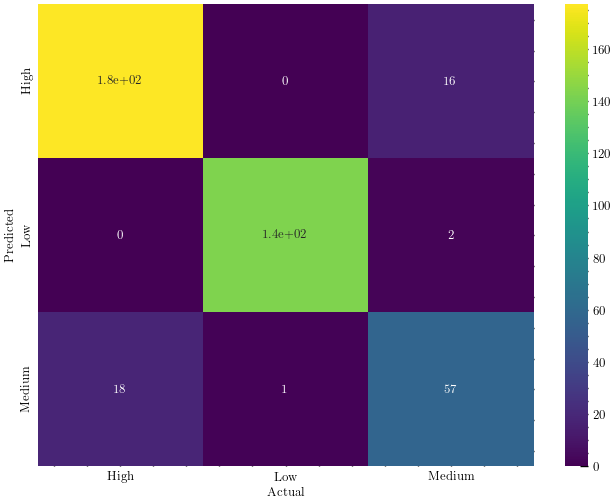

In [7]:
# We can visualize the performance of the classification by producing
# the confusion matrix. 

conf_matrix = pd.crosstab(pred_actual_df["Predicted"], pred_actual_df["Actual"])
sns.heatmap(conf_matrix, annot = True, cmap = "viridis")

<Axes: xlabel='Actual', ylabel='Predicted'>

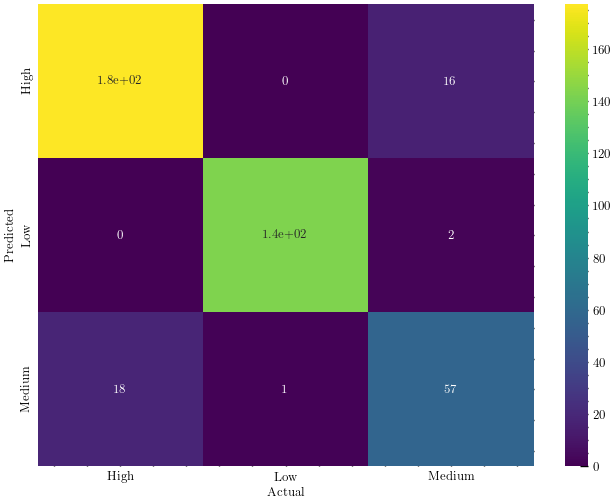

In [8]:
# What's nifty about sklearn is that we have an entire library of
# machine learning algorithms with similar interfaces. Switching
# from one algorithm to another is almost as simple as changing the
# model class the data is being fed into.

perceptron = linear_model.Perceptron()
perceptron.fit(X_train, y_train)

y_pred = model.predict(X_test)
pred_actual_df = pd.DataFrame([y_pred, y_test]).T
pred_actual_df.columns = ["Predicted", "Actual"]
conf_matrix = pd.crosstab(pred_actual_df["Predicted"], pred_actual_df["Actual"])

sns.heatmap(conf_matrix, annot = True, cmap = "viridis")

In [9]:
## Sometimes people opt to use categorical data itself as features
## of the input data, but the model expects the inputs to be numerical
## values. We need to preprocess these columns, the simples of which
## is putting them in a one-hot encoder.

feature_cols = ["GENDER", "STATUS", "HOMEOWNER"]
features = customer_data.loc[:, feature_cols]

# Feed the columns with categorical data into the encoder
encoder = preprocessing.OneHotEncoder()
encoder.fit(features)

# Fetch the encoding output. These can then be fed as additional
# columns into your classifier.
ohc_feats = encoder.fit_transform(features).toarray()
ohc_colnames = encoder.get_feature_names_out()
ohc_df = pd.DataFrame(ohc_feats, columns=ohc_colnames)

# Print the output of the encoder,  which should all be numbers. Note
# that one-hot encoding the HOMEOWNER feature is redundant, since it
# is already binary and can be encoded into a single column.
ohc_df

,GENDER_F,GENDER_M,STATUS_D,STATUS_M,STATUS_S,HOMEOWNER_N,HOMEOWNER_Y
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
2061,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2062,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2063,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2064,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [10]:
# Lab Output: sdss_specgals
# Consider the the dataset below. Pick one classifier for each type: linear, tree-based, and ensemble-based classifiers. Apply the 3 classifiers to the dataset below (download on the file_input_uploads on the left) to predict the bptclass column.

# Code is not needed for the output in this activity. Instead, we need you to describe the nature of the dataset (what each column means) and description for the classifier you used.

# Refer to the following links for information on the data:

# - https://github.com/astroML/astroML/blob/main/astroML/datasets/sdss_specgals.py
# - https://www.sdss.org/dr18/
# - Page 14-29 of: Ivezic et al. "Statistics, Data Mining, and Machine Learning in Astronomy"

In [11]:
# sdss_df = pd.read_csv("sdss_specgals.csv.gz")
# sdss_df
# a
# print(sdss_df.columns)

In [12]:
# # Load dataset (assuming CSV format)
# df = pd.read_csv("sdss_specgals.csv.gz")

# # Select features and target variable
# features = [
#     "h_beta_flux", "h_beta_flux_err", "h_delta_flux", "h_delta_flux_err", 
#     "d4000", "d4000_err", "lgm_tot_p50", "sfr_tot_p50"
# ]
# target = "bptclass"

# features = customer_data.loc[:, feature_cols]
# target = customer_data.loc[:, target_col]

# ## We then split the dataset into training and testing sets.
# X_train, X_test, y_train, y_test = model_selection.train_test_split(
#     features, target, train_size = 0.8, random_state = 0)

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Load dataset
sdss_df = pd.read_csv("sdss_specgals.csv.gz")

# Define features and target
feature_cols = [
    'nii_6584_flux', 'h_alpha_flux', 'oiii_5007_flux', 'h_beta_flux',
    'd4000', 'velDisp', 'modelMag_u', 'modelMag_g', 'modelMag_r',
    'modelMag_i', 'modelMag_z', 'lgm_tot_p50', 'sfr_tot_p50'
    ]
target_col = 'bptclass'

# Drop rows with missing values in selected columns
sdss_df = sdss_df.dropna(subset=feature_cols + [target_col])

X = sdss_df[feature_cols]
y = sdss_df[target_col]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
# # Initialize classifiers
# log_reg = LogisticRegression(max_iter=500)
# # Train models
# log_reg.fit(X_train, y_train)
# # Predictions
# y_pred_log = log_reg.predict(X_test)


In [16]:
# Evaluation function
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print(classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Grapher function
def grapher(X, y, model, model_name):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', alpha=0.6)
    plt.title(f'{model_name} Feature Distribution')
    plt.xlabel(feature_cols[0])
    plt.ylabel(feature_cols[1])
    plt.legend(title='Class')
    plt.show()
# science_plot()

In [17]:
# evaluate_model(y_test, y_pred_log, "Logistic Regression")

In [18]:
# decision_tree = DecisionTreeClassifier()
# decision_tree.fit(X_train, y_train)
# y_pred_tree = decision_tree.predict(X_test)

In [19]:
# evaluate_model(y_test, y_pred_tree, "Decision Tree")

In [20]:
random_forest = RandomForestClassifier(n_estimators=50, random_state=42, max_depth = 10)
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)


Random Forest Performance:
              precision    recall  f1-score   support

          -1       0.92      0.95      0.94     50197
           1       0.89      0.92      0.91     28958
           2       0.84      0.82      0.83     28819
           3       0.70      0.62      0.66      7924
           4       0.79      0.53      0.63      3049
           5       0.72      0.70      0.71     13373

    accuracy                           0.86    132320
   macro avg       0.81      0.76      0.78    132320
weighted avg       0.86      0.86      0.86    132320



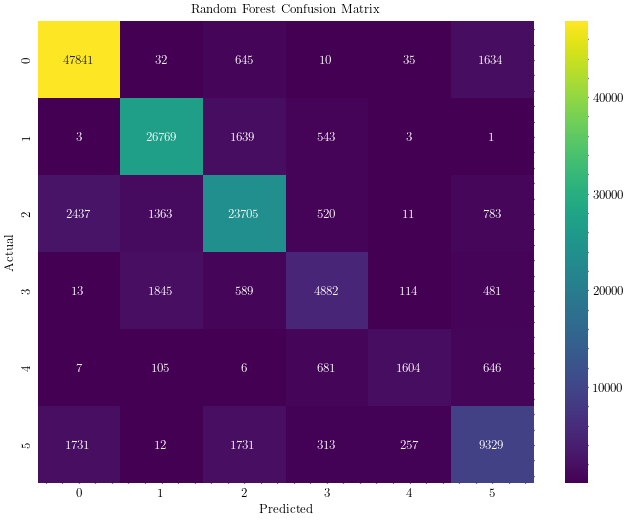

In [22]:
evaluate_model(y_test, y_pred_forest, "Random Forest")

In [21]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load dataset
# sdss_df = pd.read_csv("sdss_specgals.csv.gz")

# # Define features and target
# feature_cols = [
#     'nii_6584_flux', 'h_alpha_flux', 'oiii_5007_flux', 'h_beta_flux',
#     'd4000', 'velDisp', 'modelMag_u', 'modelMag_g', 'modelMag_r',
#     'modelMag_i', 'modelMag_z', 'lgm_tot_p50', 'sfr_tot_p50'
#     ]
# target_col = 'bptclass'

# # Drop rows with missing values in selected columns
# sdss_df = sdss_df.dropna(subset=feature_cols + [target_col])

# X = sdss_df[feature_cols]
# y = sdss_df[target_col]

# # Standardize features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Split dataset
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # Initialize classifiers
# log_reg = LogisticRegression(max_iter=500)
# decision_tree = DecisionTreeClassifier()
# random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# # Train models
# log_reg.fit(X_train, y_train)
# decision_tree.fit(X_train, y_train)
# random_forest.fit(X_train, y_train)

# # Predictions
# y_pred_log = log_reg.predict(X_test)
# y_pred_tree = decision_tree.predict(X_test)
# y_pred_forest = random_forest.predict(X_test)

# # Evaluation function
# def evaluate_model(y_test, y_pred, model_name):
#     print(f"\n{model_name} Performance:")
#     print(classification_report(y_test, y_pred))
#     conf_matrix = confusion_matrix(y_test, y_pred)
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
#     plt.title(f'{model_name} Confusion Matrix')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.show()

# # Grapher function
# def grapher(X, y, model, model_name):
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', alpha=0.6)
#     plt.title(f'{model_name} Feature Distribution')
#     plt.xlabel(feature_cols[0])
#     plt.ylabel(feature_cols[1])
#     plt.legend(title='Class')
#     plt.show()

# # Evaluate models
# evaluate_model(y_test, y_pred_log, "Logistic Regression")
# evaluate_model(y_test, y_pred_tree, "Decision Tree")
# evaluate_model(y_test, y_pred_forest, "Random Forest")

# # Visualize feature distribution
# grapher(X_scaled, y, log_reg, "Logistic Regression")
# grapher(X_scaled, y, decision_tree, "Decision Tree")
# grapher(X_scaled, y, random_forest, "Random Forest")
